# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

q_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [4]:
city_n = []
country = []
cloudiness = []
humidity = []
maxTEMP = []
windspeed = []
lat = []
long = []
date = []

In [6]:

count = 1

for city in cities:
      

        res = requests.get(q_url + city).json()
            
        if (res["cod"]) == 200:
              
            cityname = res["name"]
            city_n.append(res["name"])
            country.append(res["sys"]["country"])
            cloudiness.append(res["clouds"]["all"])
            humidity.append(res["main"]["humidity"])
            maxTEMP.append(res["main"]["temp_max"])
            windspeed.append(res["wind"]["speed"])
            lat.append(res["coord"]["lat"])
            long.append(res["coord"]["lon"])
            date.append(res["dt"])
    
            print ("City Number" + str(count) + " / " + cityname )

            count = count + 1

        time.sleep(2)       
    

    


City Number1 / Ukiah
City Number2 / Carnarvon
City Number3 / Puerto Ayora
City Number4 / Hermanus
City Number5 / Yellowknife
City Number6 / Rikitea
City Number7 / Sarakhs
City Number8 / Alice Springs
City Number9 / Port Alfred
City Number10 / Srednekolymsk
City Number11 / Mataura
City Number12 / Sao Jose da Coroa Grande
City Number13 / Ushuaia
City Number14 / Coquimbo
City Number15 / Dikson
City Number16 / Filadelfia
City Number17 / Najran
City Number18 / New Norfolk
City Number19 / Avarua
City Number20 / Pevek
City Number21 / Bredasdorp
City Number22 / Guerrero Negro
City Number23 / Busselton
City Number24 / Ilulissat
City Number25 / Hobart
City Number26 / Buchanan
City Number27 / Katobu
City Number28 / East London
City Number29 / Barrow
City Number30 / Qaanaaq
City Number31 / Luau
City Number32 / Arraial do Cabo
City Number33 / Avera
City Number34 / Butaritari
City Number35 / Airai
City Number36 / Hovd
City Number37 / Fairbanks
City Number38 / Hilo
City Number39 / Naze
City Number40 

City Number321 / Grindavik
City Number322 / Monrovia
City Number323 / Okitipupa
City Number324 / Hobyo
City Number325 / Bahia Honda
City Number326 / Osakarovka
City Number327 / Iberia
City Number328 / Northam
City Number329 / Luderitz
City Number330 / Clyde River
City Number331 / Saint-Philippe
City Number332 / Tasiilaq
City Number333 / Comodoro Rivadavia
City Number334 / Kiama
City Number335 / Namatanai
City Number336 / Guatire
City Number337 / Marsh Harbour
City Number338 / Verkhnevilyuysk
City Number339 / Coachella
City Number340 / Mahon
City Number341 / Otukpo
City Number342 / Blagoyevo
City Number343 / Sirnak
City Number344 / La Romana
City Number345 / Pandharpur
City Number346 / Hjelset
City Number347 / Dunedin
City Number348 / Bardstown
City Number349 / Vila Franca do Campo
City Number350 / Merauke
City Number351 / Solhan
City Number352 / Goderich
City Number353 / Sawakin
City Number354 / Havre-Saint-Pierre
City Number355 / Taksimo
City Number356 / Nichinan
City Number357 / Meth

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
city_weather = {"City Name": city_n, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Max Temp": maxTEMP, "Wind Speed": windspeed, "Lat": lat, "Lng": long}

In [17]:
city_w = pd.DataFrame(city_weather)
city_w.count()

City Name     542
Cloudiness    542
Country       542
Date          542
Humidity      542
Max Temp      542
Wind Speed    542
Lat           542
Lng           542
dtype: int64

In [20]:
city_w.to_csv('output_data/city_w.csv')

city_w.head()

,City Name,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Lat,Lng
0,Ukiah,90,US,1547520960,79,48.02,8.19,39.15,-123.21
1,Carnarvon,0,ZA,1547524943,49,52.63,6.85,-30.97,22.13
2,Puerto Ayora,88,EC,1547524977,100,76.75,5.61,-0.74,-90.35
3,Hermanus,24,ZA,1547524390,95,48.76,2.15,-34.42,19.24
4,Yellowknife,75,CA,1547521200,68,-18.41,9.17,62.45,-114.38


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

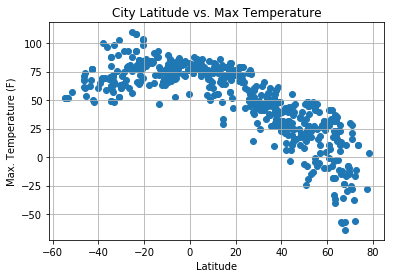

In [22]:
plt.scatter(city_w["Lat"], city_w["Max Temp"], marker = "o")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Lat_vs_Max_TEMP')

#### Latitude vs. Humidity Plot

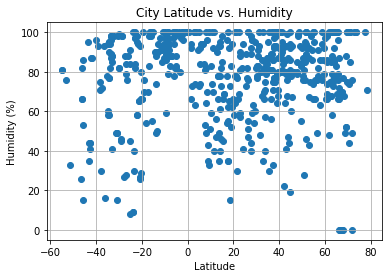

In [24]:
plt.scatter(city_w["Lat"], city_w["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Lat_vs_Hum')

#### Latitude vs. Cloudiness Plot

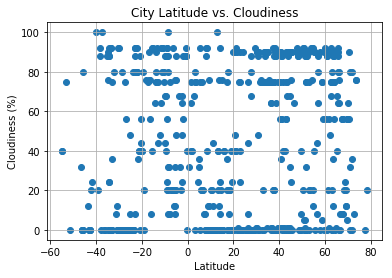

In [25]:
plt.scatter(city_w["Lat"], city_w["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Lat_vs_Cloud')

#### Latitude vs. Wind Speed Plot

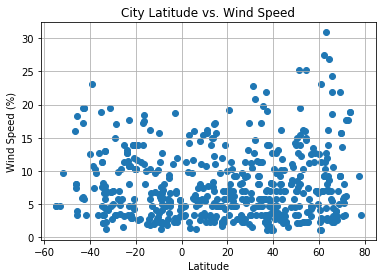

In [26]:
plt.scatter(city_w["Lat"], city_w["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Lat_vs_Wind')